Linear regressions help us make predictions on the future, based on past data that is training phase.
Here we use the diabetes data set in scikit-learn.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

Now for implementing, convert this data into a pandas dataframe

In [2]:
data = load_diabetes()
my_df = pd.DataFrame(data.data, columns = data.feature_names)
print(my_df)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1  

We are trying to predict the values in the next year using LR. To verify we can import the already availible data in this and then predict and cross verify the same.

In [3]:
my_df['Target'] = data.target
print(my_df)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  Target  
0   -0.002592  0.019907 -0.0176

We now need to split all these attributes to X, y variables. X --> all the values that need to be compared.
y --> Known result i.e. The impact of these attributes on the target

In [4]:
X = my_df.drop('Target',axis=1)
y = my_df['Target']

Now split the data into training and testing in an 80:20 ratio. This can be done using scikit-learn

In [5]:
from sklearn.model_selection import train_test_split

We need to do both a X train and test as well as y train and test as we have 2 different var. Test size = 0.2 is 20%. Random_state defines the manual seed. We can see the dimensions of both these datasets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("Training: ", X_train.shape,y_train.shape)
print("Testing: ", X_test.shape, y_test.shape)

Training:  (353, 10) (353,)
Testing:  (89, 10) (89,)


Now we can actually create the linear regression

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

This creates the linear regression instance and now we need to train our data and test our data on this model.

In [8]:
lr.fit(X_train,y_train) #This is the fit function

LinearRegression()

After the training on this is done we can go on to predicting on the test dataset

In [9]:
y_pred = lr.predict(X_test)

After we have done this part, we can actually compare with the real values because we already have the Target

In [10]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
#These will show the performance of the model also called performance metrics

In [11]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mea = mean_absolute_error(y_test,y_pred)
intercept = lr.intercept_
print("r2: ", r2)
print("mea: ", mea)
print("mse: ", mse)
print("Intercept: ", intercept)

r2:  0.4526027629719195
mea:  42.79409467959994
mse:  2900.193628493482
Intercept:  151.34560453985995


Here the r2 score shows how well the model fits the data, higher the better, lies between 0-1. Mathematically variance of the dependent variable (target here) explained by the independent variable

The mean squared error: The avg squared distance between the predicted and actual values, here the lower the better because if it's closer to the line through the scatter plot it shows accuracy.

The mean absolute distance: Avg absolute distance between predicted and actual values. Here the lower the better again

Intercept_ This is the starting point of the regression line on the y-axis. Mathematically the value of dependent variable (target) when the value of the independent variable is 0.
If positive, the target increases as the features increase
If negative, the target decreases as the features decrease

We can also graph these.

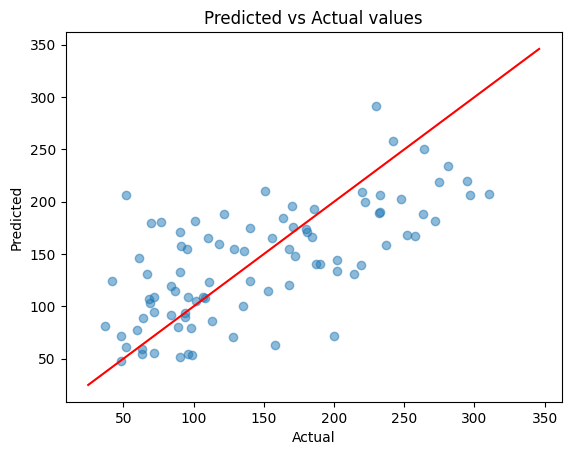

In [12]:
import matplotlib.pyplot as plt
#y --> predictions, x --> actaul values(target)
#If the model fits well the points should lie close to the regression line
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual values")
plt.show()

Now we can plot residuals. Residuals are plotted against the predicted values of the target variables. If the model is a good fit there will be a random point scatter around 0 in the residual plot with no noticable trend

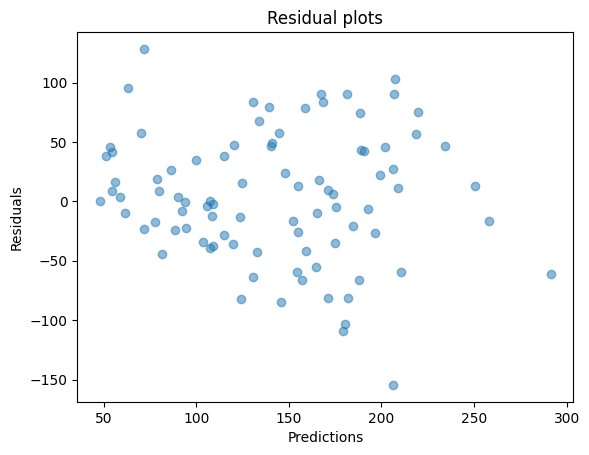

In [13]:
plt.scatter(y_pred,y_test-y_pred,alpha=0.5)
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plots")
plt.show()
